In [1]:
import os
import numpy as np
import pandas as pd

import sys
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)

In [5]:
#Tokens
IEX_PUBLISHABLE_TOKEN = os.environ.get('IEX_PUBLISHABLE_TOKEN')
IEX_SECRET_TOKEN = os.environ.get('IEX_SECRET_TOKEN')


In [6]:
tickers=pd.DataFrame(get_historical_data(token=IEX_SECRET_TOKEN,start=start_date, end=end_date, symbols=list_of_tickers, output_format='pandas'))
tickers.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)


In [7]:
tickers.head()

,SPY,AGG
,close,close
date,,
2018-09-04,289.81,106.06
2018-09-05,289.03,106.01
2018-09-06,288.16,106.19
2018-09-07,287.60,105.81
2018-09-10,288.10,105.91


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [8]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = tickers.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-09-04,NaN,NaN
2018-09-05,-0.002691,-0.000471
2018-09-06,-0.003010,0.001698
2018-09-07,-0.001943,-0.003578
2018-09-10,0.001739,0.000945


In [9]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']

In [10]:
# Calculate Value of Average Daily Returns
avg_daily_returns_spy = daily_returns.mean()['SPY']['close']
avg_daily_returns_agg = daily_returns.mean()['AGG']['close']



In [11]:
# Save the last day's closing price
# YOUR CODE HERE


tickers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-09-04 to 2019-08-30
Data columns (total 2 columns):
(SPY, close)    250 non-null float64
(AGG, close)    250 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


In [12]:
spy_last_close = tickers['SPY']['close'][-1]
spy_last_close

292.45

In [13]:
agg_last_close = tickers['AGG']['close'][-1]
agg_last_close

114.13

In [20]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [21]:
#Setting up Dataframes 
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [22]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    simulated_spy_prices = [spy_last_close]
    simulated_agg_prices = [agg_last_close]
    
    for i in range(number_records):
        simulate_spy = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_dev_daily_return_spy))
        simulate_agg = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_returns_agg, std_dev_daily_return_agg))
        
        simulated_spy_prices.append(simulate_spy)
        simulated_agg_prices.append(simulate_agg)
        
    simulated_price_df[f"SPY Prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df[f"AGG Prices "] = pd.Series(simulated_agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    

    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    

    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994639,1.001879,1.004069,1.005899,0.999238,0.998422,1.002999,0.984442,1.002688,1.011873,...,1.007398,0.989228,0.992931,1.001424,1.003080,1.000110,1.006292,0.984375,1.018031,0.997841
2,0.982258,1.006922,0.997651,1.006659,1.003307,1.003549,1.004740,0.986699,1.019084,1.014656,...,1.001525,0.996466,0.990823,0.993355,1.004525,1.001404,0.991286,0.978023,1.014847,0.998158
3,0.981752,1.008028,0.995636,1.017646,1.010847,0.999615,1.006340,0.982175,1.028936,1.013770,...,0.999628,0.988963,0.979783,0.984639,1.006958,1.004703,0.989476,0.964588,1.009302,0.991793
4,0.984718,1.001268,0.989957,1.019991,1.017104,1.009072,1.010640,0.984751,1.031648,1.021523,...,0.988329,0.992023,0.985584,0.982412,1.014022,1.008462,0.994521,0.966187,1.011641,0.988869


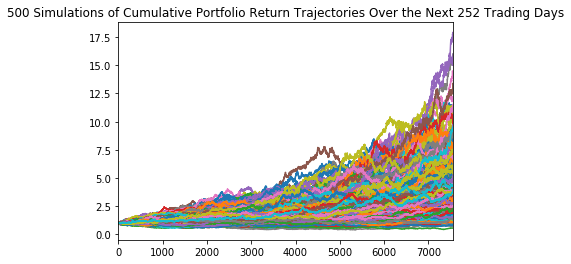

In [23]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"

portfolio_cumulative_returns.plot(legend=None, title=plot_title)


In [31]:
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()


0    2.750405
1    3.042040
2    3.005310
3    5.033200
4    4.065702
Name: 7560, dtype: float64

In [36]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.90])
confidence_interval.head()

0.05    1.315631
0.90    6.401778
Name: 7560, dtype: float64

In [37]:
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(2.299, 4.021]      0.380
(0.559, 2.299]      0.260
(4.021, 5.744]      0.198
(5.744, 7.466]      0.106
(7.466, 9.188]      0.022
(9.188, 10.91]      0.016
(10.91, 12.632]     0.008
(14.354, 16.076]    0.004
(12.632, 14.354]    0.004
(16.076, 17.799]    0.002
Name: 7560, dtype: float64

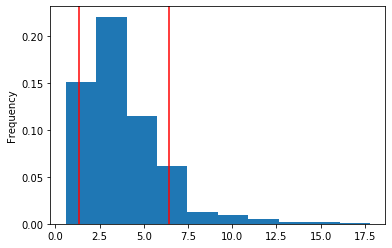

In [38]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [53]:

# YOUR CODE HERE 
portfolio_cumulative_percentile = portfolio_cumulative_returns.to_numpy()

for i in [10,50,90]:
    x = (np.percentile(portfolio_cumulative_percentile, i))
    print(x)


0.9896484135641365
1.6666175497303146
3.694592163374336


### Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [56]:
# YOUR CODE HERE
growth = []
for i in [10,50,90]:
    growth.append((np.percentile(portfolio_cumulative_percentile, i)))
for i in growth:
    print((1+i)*50000)

99482.42067820684
133330.87748651573
234729.60816871683


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE